In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from src import make_rag
rag, langfuse_handler = make_rag()

USER_AGENT environment variable not set, consider setting it to identify your requests.


Loading Chroma from D:/code/library_rag/storage/
Loading BM25 from D:/code/library_rag/storage/bm25.pkl


In [4]:
inputs = {
    "question": "Why does king henry invade france in the movie?",
    "max_retries": 3,
    "MAX_ANSWER_LENGTH": 150,
}

results = []
for event in rag.graph.stream(inputs, config={"callbacks": [langfuse_handler]}):
    results.append(event)

Reformulating question...
Reformulated question : Why does King Henry VIII invade France in a movie?
Explanation : Added 'VIII' to specify which King Henry is being referred to, as there are multiple historical figures with that name. Also added 'in a movie' to clarify the context of the invasion.
Routing question...
Routing question to web_search...
Searching the web...
Generating answer...


In [5]:
from IPython.display import display, Markdown
display(Markdown(results[-1]['generate_answer']['answer']))

Based on the provided context, it appears that King Henry VIII does not actually invade France in the movie. Instead, he is advised by his nobles to avoid confronting the French due to their numerical superiority and the English forces' weakness. However, Falstaff proposes a bold plan to utilize the muddy field at Agincourt to neutralize the French advantage.

The context suggests that Henry VIII adopts a defensive position, organizing his men into a line with longbowmen flanked by men-at-arms. The movie depicts the English successfully repelling the French cavalry and infantry charges, resulting in significant casualties for the French.

It can be inferred that the invasion of France is not the primary objective of the movie, but rather a means to regain Aquitaine, which was lost 32 years earlier under Henry VIII's father.

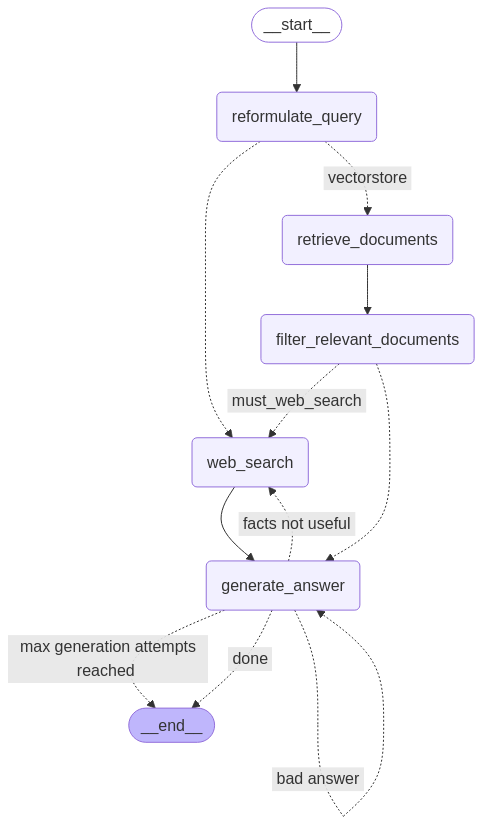

In [8]:
from IPython.display import Image, display
display(Image(rag.graph.get_graph().draw_mermaid_png()))